# Exploratory Data Analysis - Depression Risk Study

This notebook explores the mental health dataset to understand depression risk factors through demographics, clinical factors, and mindfulness interventions.

**Nikhileswara Rao Sulake<sup>1</sup>, Sai Manikanta Eswar Machara<sup>2</sup>, Divya Katam<sup>3</sup>**  

<sup>1</sup> Department of CSE, RGUKT Nuzvid  
<sup>2</sup> Department of ECE, RGUKT Nuzvid  
<sup>3</sup> Department of ECE, RGUKT Nuzvid  


## Import Required Libraries

Import necessary libraries for data analysis and visualization.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visualizations

# For better visualization in the notebook
%matplotlib inline

## Load and Inspect the Data

Load the dataset from the Excel file and get an initial overview.

In [2]:
# Load the dataset
df = pd.read_excel('../Track1_Data/raw/mental_health_dataset.xlsx')

# Display the first few rows
print("First few rows of the dataset:")
display(df.head())

# Get basic information about the dataset
print("\nDataset Info:")
display(df.info())

First few rows of the dataset:


,age,sex,hospital_center_id,condition,condition_type,bdi_ii_baseline,bdi_ii_after_intervention_12w,bdi_ii_follow_up_24w,mindfulness_therapies_started,mindfulness_therapies_completed
0,78.0,female,1,Cancer,Breast,10.0,3.0,7.0,14,13
1,70.0,female,1,Cancer,Breast,4.0,4.0,8.0,14,12
2,75.0,female,1,Cancer,Breast,18.0,10.0,13.0,4,4
3,73.0,female,1,Cancer,Breast,11.0,NaN,NaN,0,0
4,62.0,female,1,Cancer,Breast,5.0,11.0,20.0,12,7



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              209 non-null    float64
 1   sex                              210 non-null    object 
 2   hospital_center_id               210 non-null    int64  
 3   condition                        210 non-null    object 
 4   condition_type                   209 non-null    object 
 5   bdi_ii_baseline                  209 non-null    float64
 6   bdi_ii_after_intervention_12w    167 non-null    float64
 7   bdi_ii_follow_up_24w             166 non-null    float64
 8   mindfulness_therapies_started    210 non-null    int64  
 9   mindfulness_therapies_completed  210 non-null    int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 16.5+ KB


None

## Statistical Overview

Get descriptive statistics of the numerical variables in the dataset.

In [7]:
# Get descriptive statistics
print("Descriptive Statistics:")
display(df.describe())

# Get counts of categorical variables
print("\nGender Distribution:")
display(df['sex'].value_counts())

print("\nMissing Values:")
display(df.isnull().sum())

Descriptive Statistics:


,age,hospital_center_id,bdi_ii_baseline,bdi_ii_after_intervention_12w,bdi_ii_follow_up_24w,mindfulness_therapies_started,mindfulness_therapies_completed
count,209.000000,210.000000,209.000000,167.000000,166.000000,210.000000,210.000000
mean,65.220096,1.576190,11.167464,7.479042,6.716867,25.109524,21.604762
std,11.179453,0.867491,8.459502,7.271697,7.335961,32.703575,30.242259
min,25.000000,1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000
25%,58.000000,1.000000,5.000000,2.000000,2.000000,2.000000,0.250000
50%,67.000000,1.000000,10.000000,6.000000,5.000000,9.500000,7.000000
75%,73.000000,2.750000,15.000000,11.000000,9.000000,35.500000,32.500000
max,86.000000,3.000000,43.000000,40.000000,41.000000,180.000000,178.000000



Gender Distribution:


sex
male      119
female     91
Name: count, dtype: int64


Missing Values:


age                                 1
sex                                 0
hospital_center_id                  0
condition                           0
condition_type                      1
bdi_ii_baseline                     1
bdi_ii_after_intervention_12w      43
bdi_ii_follow_up_24w               44
mindfulness_therapies_started       0
mindfulness_therapies_completed     0
dtype: int64

## Gender Distribution

Create a bar chart to compare the count of female vs. male patients.

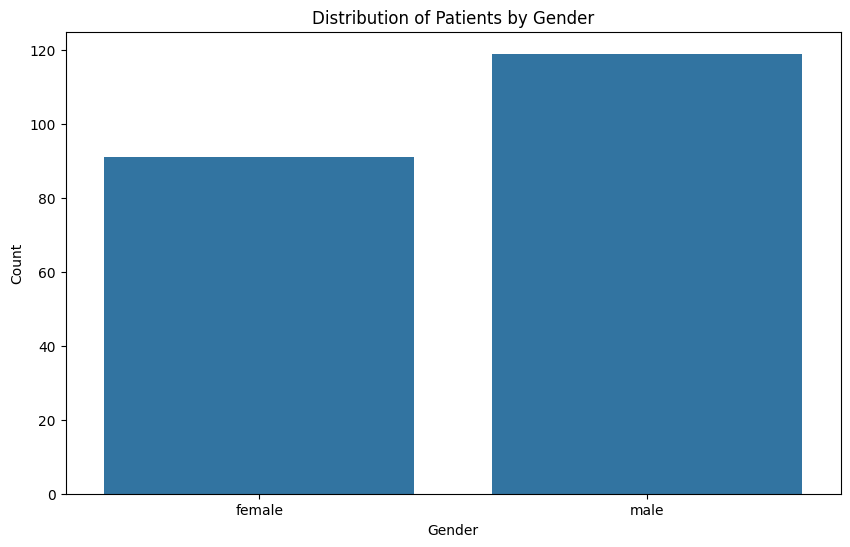

In [8]:
# Create a bar plot for gender distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='sex')
plt.title('Distribution of Patients by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

## Age Distribution

Create a histogram to visualize the distribution of patient age.

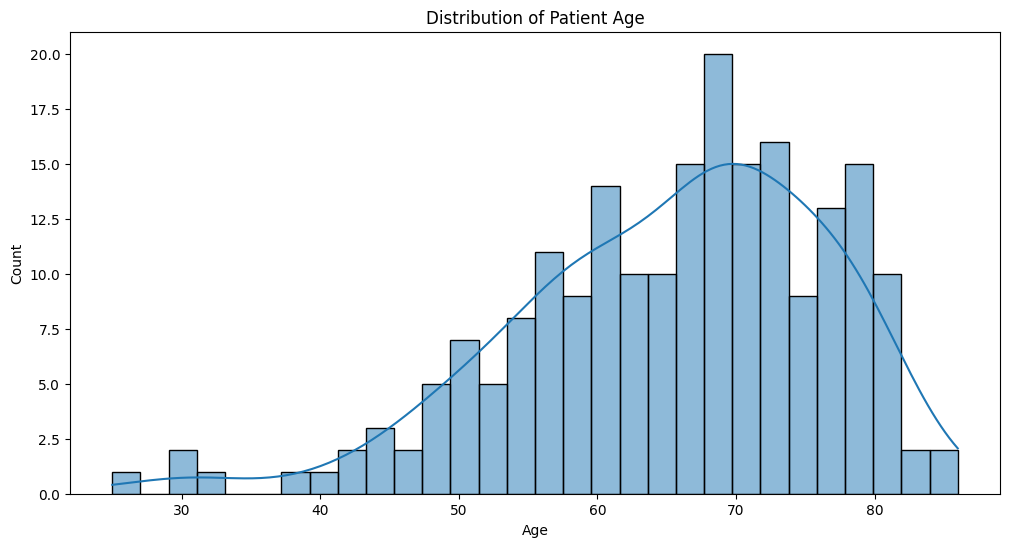


Age Statistics:


count    209.000000
mean      65.220096
std       11.179453
min       25.000000
25%       58.000000
50%       67.000000
75%       73.000000
max       86.000000
Name: age, dtype: float64

In [9]:
# Create a histogram for age distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='age', bins=30, kde=True)
plt.title('Distribution of Patient Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Print summary statistics for age
print("\nAge Statistics:")
display(df['age'].describe())

## BDI-II Score Distribution Over Time

Compare the distribution of BDI-II scores at baseline, after 12 weeks intervention, and at 24 weeks follow-up.

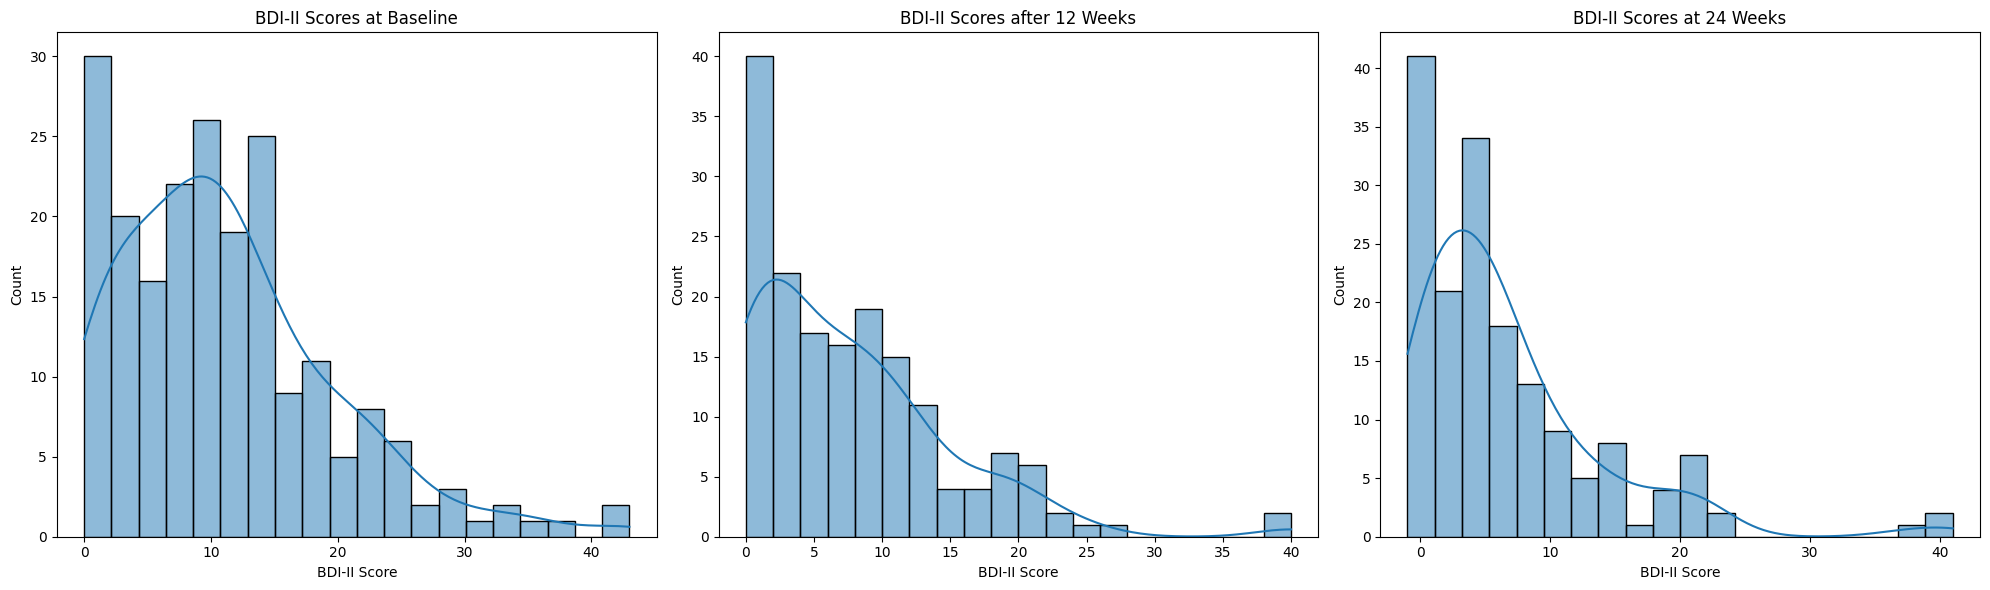


BDI-II Score Statistics:


,bdi_ii_baseline,bdi_ii_after_intervention_12w,bdi_ii_follow_up_24w
count,209.000000,167.000000,166.000000
mean,11.167464,7.479042,6.716867
std,8.459502,7.271697,7.335961
min,0.000000,0.000000,-1.000000
25%,5.000000,2.000000,2.000000
50%,10.000000,6.000000,5.000000
75%,15.000000,11.000000,9.000000
max,43.000000,40.000000,41.000000



Mean BDI-II Scores:
Baseline: 11.17
12 Weeks: 7.48
24 Weeks: 6.72


In [10]:
# Create subplots for BDI-II scores at different time points
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

# Plot baseline scores
sns.histplot(data=df, x='bdi_ii_baseline', bins=20, kde=True, ax=ax1)
ax1.set_title('BDI-II Scores at Baseline')
ax1.set_xlabel('BDI-II Score')
ax1.set_ylabel('Count')

# Plot 12-week scores
sns.histplot(data=df, x='bdi_ii_after_intervention_12w', bins=20, kde=True, ax=ax2)
ax2.set_title('BDI-II Scores after 12 Weeks')
ax2.set_xlabel('BDI-II Score')
ax2.set_ylabel('Count')

# Plot 24-week scores
sns.histplot(data=df, x='bdi_ii_follow_up_24w', bins=20, kde=True, ax=ax3)
ax3.set_title('BDI-II Scores at 24 Weeks')
ax3.set_xlabel('BDI-II Score')
ax3.set_ylabel('Count')

plt.tight_layout()
plt.show()

# Calculate summary statistics for each time point
print("\nBDI-II Score Statistics:")
bdi_stats = df[['bdi_ii_baseline', 'bdi_ii_after_intervention_12w', 'bdi_ii_follow_up_24w']].describe()
display(bdi_stats)

# Calculate mean scores at each time point
print("\nMean BDI-II Scores:")
mean_scores = {
    'Baseline': df['bdi_ii_baseline'].mean(),
    '12 Weeks': df['bdi_ii_after_intervention_12w'].mean(),
    '24 Weeks': df['bdi_ii_follow_up_24w'].mean()
}
for time, score in mean_scores.items():
    print(f"{time}: {score:.2f}")

## Mindfulness Therapy Analysis

Analyze the completion rates and effectiveness of mindfulness therapies.

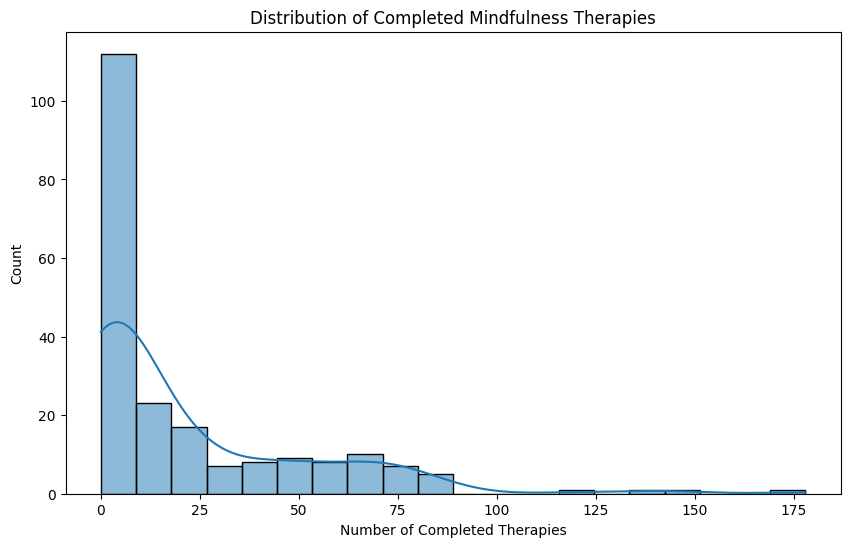

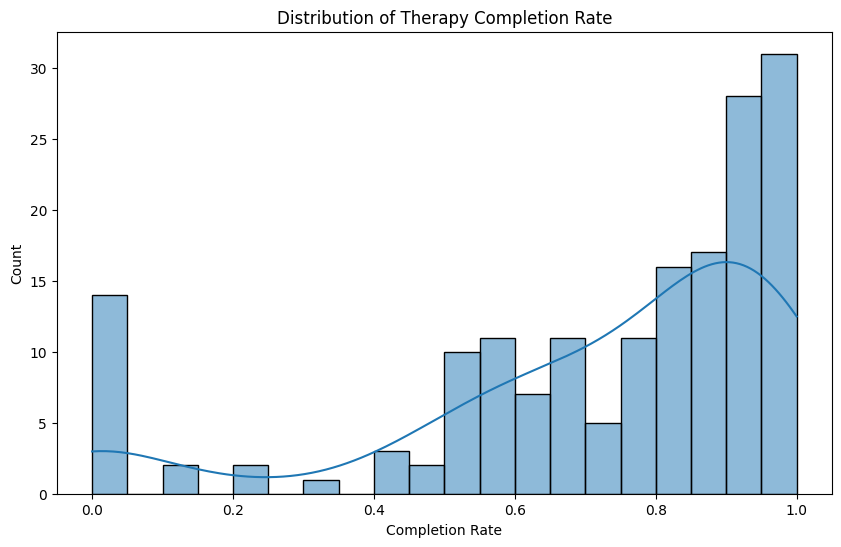


Completion Rate Statistics:


count    171.000000
mean       0.718109
std        0.285101
min        0.000000
25%        0.600000
50%        0.814815
75%        0.931128
max        1.000000
Name: completion_rate, dtype: float64

In [11]:
# Create a histogram for completed therapies
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='mindfulness_therapies_completed', bins=20, kde=True)
plt.title('Distribution of Completed Mindfulness Therapies')
plt.xlabel('Number of Completed Therapies')
plt.ylabel('Count')
plt.show()

# Calculate completion rate
df['completion_rate'] = df['mindfulness_therapies_completed'] / df['mindfulness_therapies_started']

# Create a histogram for completion rate
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='completion_rate', bins=20, kde=True)
plt.title('Distribution of Therapy Completion Rate')
plt.xlabel('Completion Rate')
plt.ylabel('Count')
plt.show()

# Print summary statistics
print("\nCompletion Rate Statistics:")
display(df['completion_rate'].describe())

## Treatment Effectiveness Analysis

Analyze the short-term (12 weeks) and long-term (24 weeks) improvements in BDI-II scores.

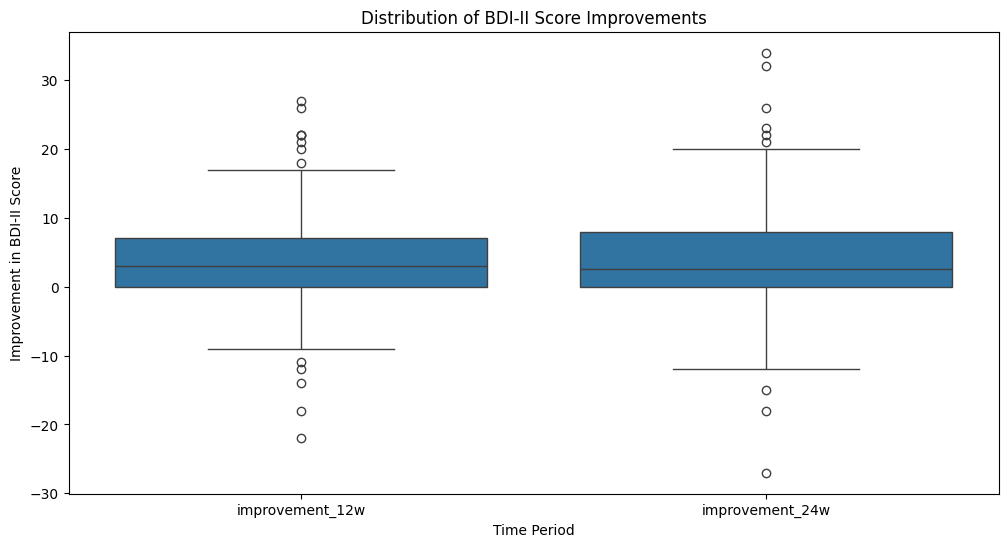


Improvement Statistics:

12-week improvement:


count    167.000000
mean       3.568862
std        7.417400
min      -22.000000
25%        0.000000
50%        3.000000
75%        7.000000
max       27.000000
Name: improvement_12w, dtype: float64


24-week improvement:


count    166.000000
mean       4.265060
std        8.065015
min      -27.000000
25%        0.000000
50%        2.500000
75%        8.000000
max       34.000000
Name: improvement_24w, dtype: float64

In [12]:
# Calculate improvement scores
df['improvement_12w'] = df['bdi_ii_baseline'] - df['bdi_ii_after_intervention_12w']
df['improvement_24w'] = df['bdi_ii_baseline'] - df['bdi_ii_follow_up_24w']

# Create box plots for improvements
plt.figure(figsize=(12, 6))
improvement_data = pd.melt(df[['improvement_12w', 'improvement_24w']], 
                         var_name='Period', value_name='Improvement')
sns.boxplot(x='Period', y='Improvement', data=improvement_data)
plt.title('Distribution of BDI-II Score Improvements')
plt.xlabel('Time Period')
plt.ylabel('Improvement in BDI-II Score')
plt.show()

# Print summary statistics
print("\nImprovement Statistics:")
print("\n12-week improvement:")
display(df['improvement_12w'].describe())
print("\n24-week improvement:")
display(df['improvement_24w'].describe())

## Correlation Analysis

Analyze the relationship between therapy completion and improvement in BDI-II scores.

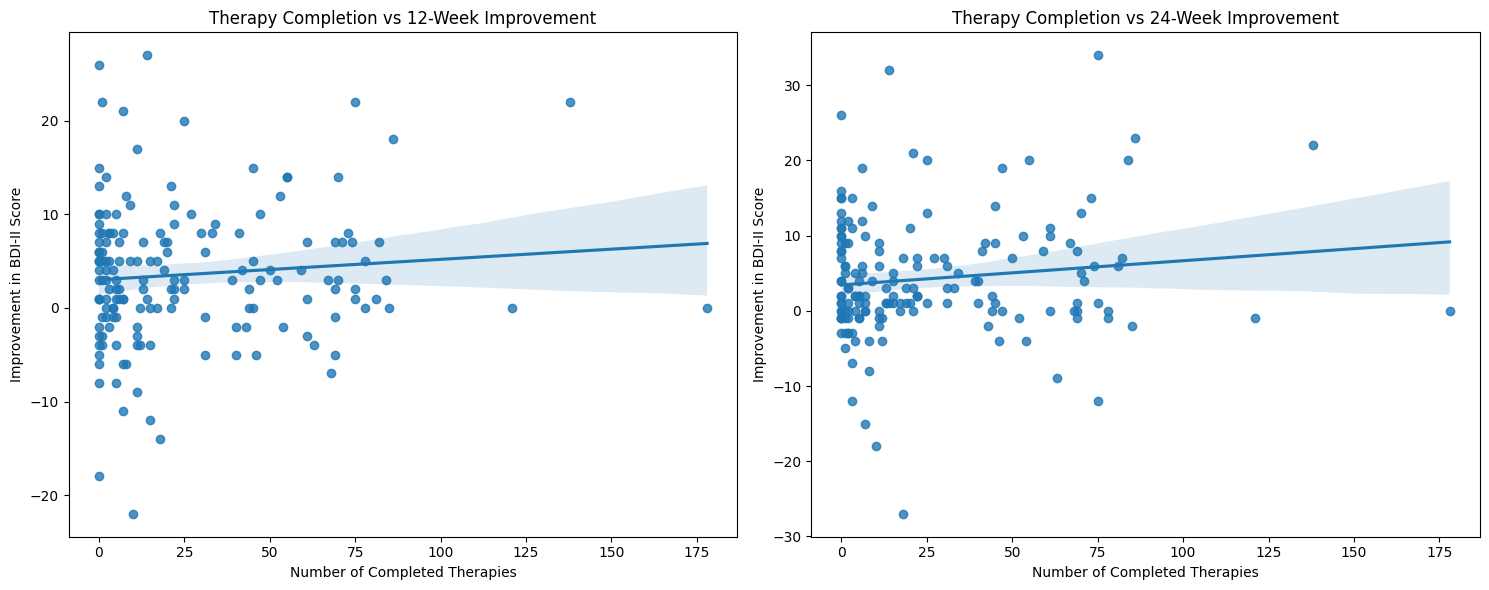


Correlations with Therapy Completion:
12-week improvement: 0.08975013346455066
24-week improvement: 0.12191150718616028


In [13]:
# Create scatter plots for therapy completion vs improvement
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 12-week improvement
sns.regplot(data=df, x='mindfulness_therapies_completed', y='improvement_12w', ax=ax1)
ax1.set_title('Therapy Completion vs 12-Week Improvement')
ax1.set_xlabel('Number of Completed Therapies')
ax1.set_ylabel('Improvement in BDI-II Score')

# 24-week improvement
sns.regplot(data=df, x='mindfulness_therapies_completed', y='improvement_24w', ax=ax2)
ax2.set_title('Therapy Completion vs 24-Week Improvement')
ax2.set_xlabel('Number of Completed Therapies')
ax2.set_ylabel('Improvement in BDI-II Score')

plt.tight_layout()
plt.show()

# Calculate correlations
print("\nCorrelations with Therapy Completion:")
print("12-week improvement:", df['mindfulness_therapies_completed'].corr(df['improvement_12w']))
print("24-week improvement:", df['mindfulness_therapies_completed'].corr(df['improvement_24w']))

## Disease-Specific Analysis

Compare the effectiveness of the treatment across different condition types.

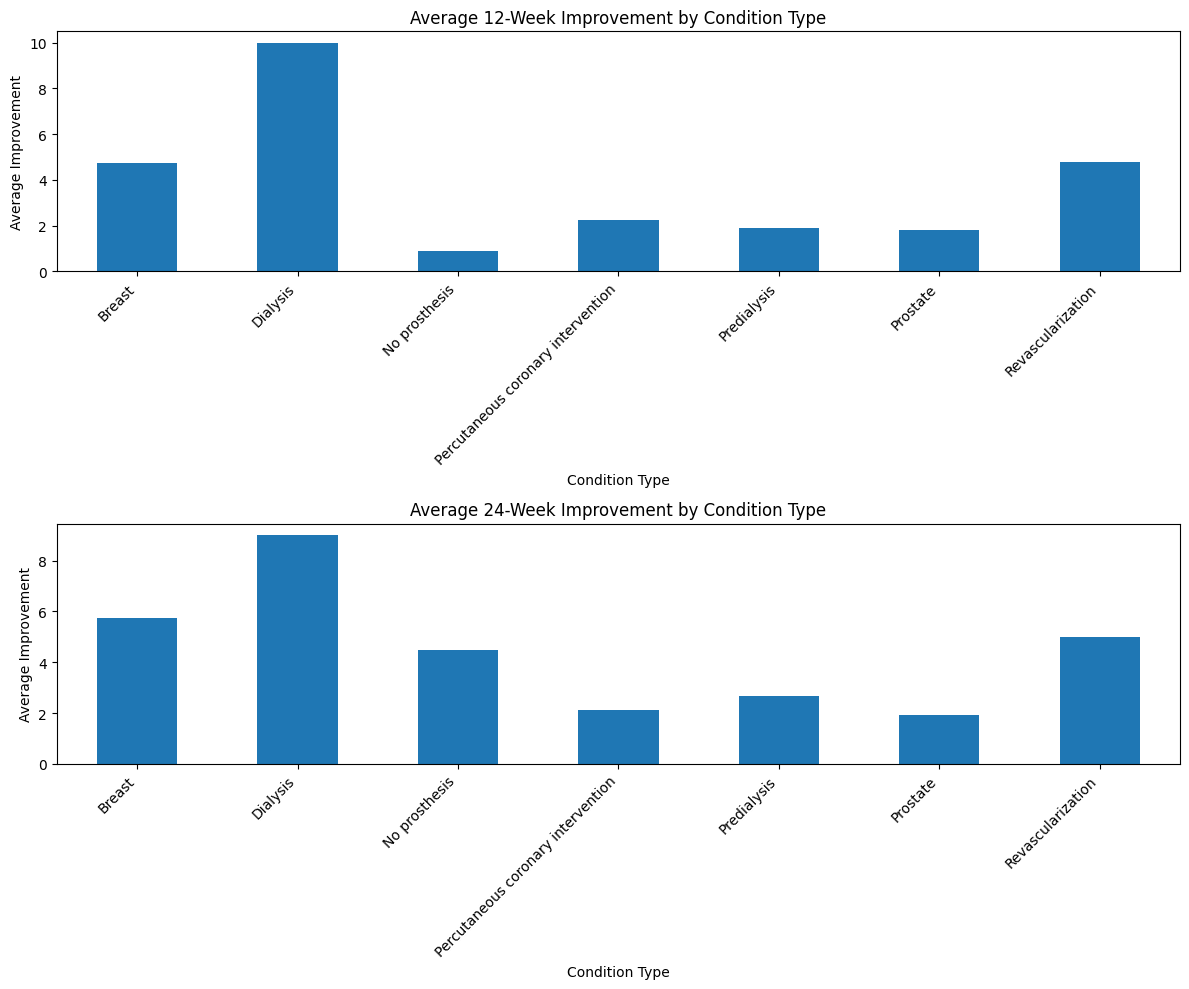


Average 12-Week Improvement by Condition:


condition_type
Breast                                 4.761194
Dialysis                              10.000000
No prosthesis                          0.900000
Percutaneous coronary intervention     2.250000
Predialysis                            1.888889
Prostate                               1.829268
Revascularization                      4.774194
Name: improvement_12w, dtype: float64


Average 24-Week Improvement by Condition:


condition_type
Breast                                5.731343
Dialysis                              9.000000
No prosthesis                         4.500000
Percutaneous coronary intervention    2.125000
Predialysis                           2.666667
Prostate                              1.926829
Revascularization                     5.000000
Name: improvement_24w, dtype: float64

In [14]:
# Calculate average improvements by condition type
improvement_by_condition_12w = df.groupby('condition_type')['improvement_12w'].mean()
improvement_by_condition_24w = df.groupby('condition_type')['improvement_24w'].mean()

# Create bar plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# 12-week improvement
improvement_by_condition_12w.plot(kind='bar', ax=ax1)
ax1.set_title('Average 12-Week Improvement by Condition Type')
ax1.set_xlabel('Condition Type')
ax1.set_ylabel('Average Improvement')
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')

# 24-week improvement
improvement_by_condition_24w.plot(kind='bar', ax=ax2)
ax2.set_title('Average 24-Week Improvement by Condition Type')
ax2.set_xlabel('Condition Type')
ax2.set_ylabel('Average Improvement')
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Print numerical results
print("\nAverage 12-Week Improvement by Condition:")
display(improvement_by_condition_12w)
print("\nAverage 24-Week Improvement by Condition:")
display(improvement_by_condition_24w)

## Demographic Analysis

Analyze the relationship between demographics (gender and age) and treatment effectiveness.

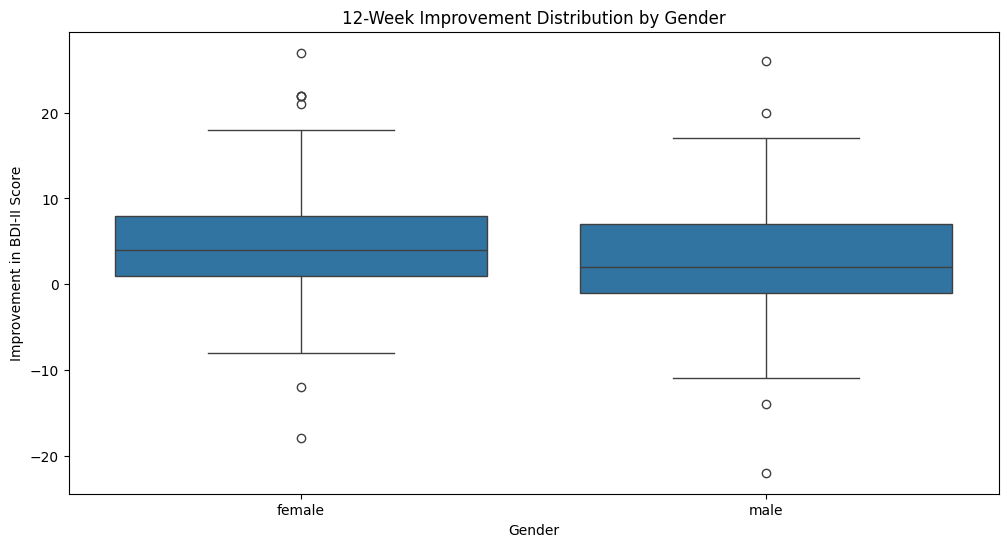

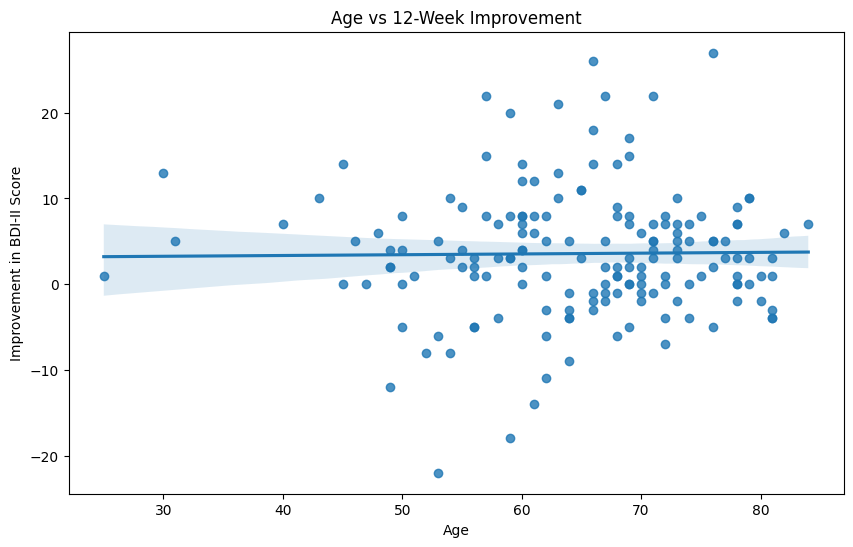


Correlation between Age and 12-week Improvement: 0.013147755483648315

Average Improvement by Gender:


,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,74.0,4.689189,7.873879,-18.0,1.0,4.0,8.0,27.0
male,93.0,2.677419,6.947257,-22.0,-1.0,2.0,7.0,26.0


In [15]:
# Compare improvements by gender
plt.figure(figsize=(12, 6))
sns.boxplot(x='sex', y='improvement_12w', data=df)
plt.title('12-Week Improvement Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Improvement in BDI-II Score')
plt.show()

# Create scatter plot for age vs improvement
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='age', y='improvement_12w')
plt.title('Age vs 12-Week Improvement')
plt.xlabel('Age')
plt.ylabel('Improvement in BDI-II Score')
plt.show()

# Calculate correlations and gender-based statistics
print("\nCorrelation between Age and 12-week Improvement:", 
      df['age'].corr(df['improvement_12w']))

print("\nAverage Improvement by Gender:")
display(df.groupby('sex')['improvement_12w'].describe())